In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Setting size(n) = 100 and probability of success(p1) = 0.1
n = 100
p1 = 0.1

In [ ]:
# Generating 100 points by Bernoulli distribution which are i.i.d. from p = 0.4
points = np.random.choice([0, 1], size=n, p=[1-p1, p1])
print(points)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [ ]:
# Counting number of 0s and 1s
n0 = n - np.sum(points)
n1 = np.sum(points)
# Number of 1s = Sum of 1s
print(f'Number of 0s = {n0}')
print(f'Number of 1s = {n1}')

Number of 0s = 92
Number of 1s = 8


### **1.** Classifier that always reports 1

In [ ]:
p_error_one = 1 - n1/n  # Same as n0/n
print(f'Probability of error that the classifier reports one = {p_error_one}')

Probability of error that the classifier reports one = 0.92


### **2.** Classifier that always reports 0

In [ ]:
p_error_zero = 1 - n0/n  # Same as n1/n
print(f'Probability of error that the classifier reports zero = {p_error_zero}')

Probability of error that the classifier reports zero = 0.07999999999999996


### **3.** Probabilitistic Classifier

In [ ]:
# Defining probabilistic classifier class to generate i.i.d points with given probability and analyse the classifier error
class probabilistic_classifier:
  def __init__(self, p_one):
    self.p_one = p_one

  def predict(self, n=1):
    return np.random.choice([0, 1], size=n, p=[1-self.p_one, self.p_one])

In [ ]:
# Generating i.i.d points for each probabilities of ones
p_ones = np.linspace(0, 1, 100)
Loss = []
for p_one in p_ones:
  classifier = probabilistic_classifier(p_one)
  predicted_data = classifier.predict(100);
  loss = np.mean((predicted_data - points)**2)
  Loss.append(loss)
  # print(f'p_one = {p_one}: \tloss = {loss}')

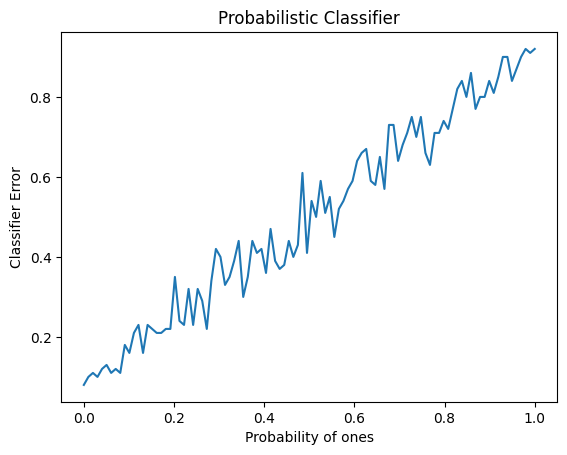

In [ ]:
# Plotting the losses of each generated predictions
X, Y = p_ones, Loss
plt.plot(X, Y)
plt.title("Probabilistic Classifier")
plt.xlabel("Probability of ones")
plt.ylabel("Classifier Error")
plt.show()